In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
df = pd.read_csv("aerofit.csv.txt")

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

# data has 180 rows and 9 columns

(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [ ]:
df[df.duplicated()]

# there are no duplicate rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [ ]:
df.info()

# there are no null values and only Product, Gender, Maritalstatus are objects in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

# basic statistical info about the int columns

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df["Age"].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

###After basic EDA, now finding relations between type of treadmill and customer characterstics

###Relation between type of treadmill and gender

In [ ]:
pd.crosstab(  index = df["Product"],  columns=df["Gender"]  ,margins = True)


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
pd.crosstab(  index = df["Product"],  columns=df["Gender"]  ,margins = True, normalize = "index")*100

# whereas this is conditional probability

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000
All,42.222222,57.777778


In [ ]:
pd.crosstab(  index = df["Product"],  columns=df["Gender"]  ,margins = True, normalize = "all")*100

# this is calculating marginal probability

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


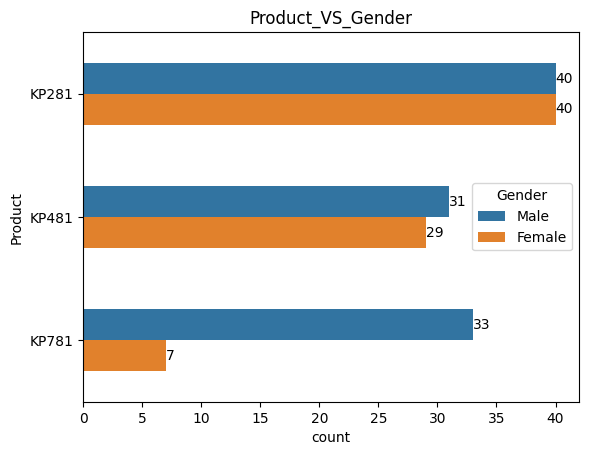

In [ ]:
x= sns.countplot(data=df, y="Product",hue = "Gender", width = 0.5)

for i in x.containers:
    x.bar_label(i, fontsize = 10)

plt.title("Product_VS_Gender")

plt.show()

with the help of joint probability calculating probabilities for each event..

##**Analysis-**

**For KP281-**

there is approx (40/180) **22.22%** chance a **female customer** opts this type of treadmill and
there is approx (40/180) **22.22%** chance a **male customer** opts for this type of treadmill.


**For KP481-**

there is approx (29/180) **16.11%** chance a **female customer** opts for this type of treadmill and
there is approx (31/180) **17.22%** chance a **male customer** opts this type of treadmill.

**For KP781-**

there is approx only (7/180) **3.88%** chance a **female customer** opts for this type of treadmill and
there is approx (33/180) **18.33%** chance a **male customer** opts this type of treadmill.

###Relalation between type of treadmill and MaritalStatus

In [ ]:
pd.crosstab(  index = df["Product"],  columns=df["MaritalStatus"]  ,margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [ ]:
pd.crosstab(  index = df["Product"],  columns=df["MaritalStatus"]  ,margins = True, normalize = "index")*100

MaritalStatus,Partnered,Single
Product,,
KP281,60.000000,40.000000
KP481,60.000000,40.000000
KP781,57.500000,42.500000
All,59.444444,40.555556


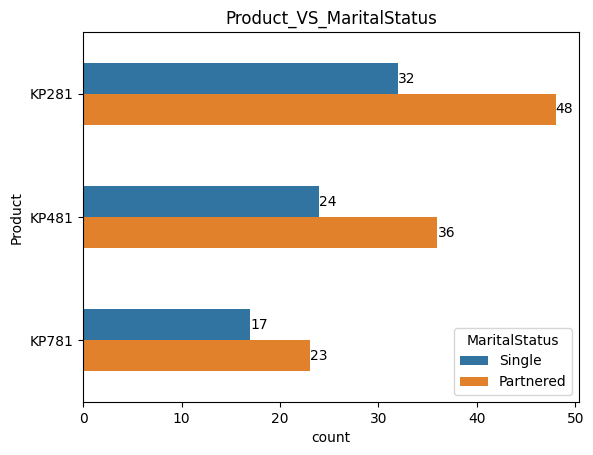

In [ ]:
x= sns.countplot(data=df, y="Product",hue = "MaritalStatus", width = 0.5)

for i in x.containers:
    x.bar_label(i, fontsize = 10)

plt.title("Product_VS_MaritalStatus")

plt.show()

##**Analaysis-**

**For KP281-**

there is approx (48/180) **26.67%** chance a **partnered/married customer** opts this type of treadmill and
there is approx (32/180) **17.78** chance a **single/unmarried customer** opts for this type of treadmill.


**For KP481-**

there is approx (36/180) **20%** chance a **partnered/married customer** opts for this type of treadmill and
there is approx (24/180) **13.33%** chance a **single/unmarried customer** opts this type of treadmill.

**For KP781-**

there is approx only (23/180) **12.78%** chance a **partnered/married customer** opts for this type of treadmill and
there is approx (17/180) **9.44%** chance a **single/unmarried customer** opts this type of treadmill.

###Relation between type of treadmill and Income

In [ ]:
df[df["Product"]=="KP281"].describe()["Income"]

count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

In [ ]:
e = ECDF(df["Income"])

In [ ]:
e(46418.02500)

# so around only 35% data is below mean value, so this distribution is not normal distribution

0.35

In [ ]:
df[df["Product"]=="KP481"].describe()["Income"]

count       60.000000
mean     48973.650000
std       8653.989388
min      31836.000000
25%      44911.500000
50%      49459.500000
75%      53439.000000
max      67083.000000
Name: Income, dtype: float64

In [ ]:
e(48973.650000)

# so around only 45% data is below mean value, so this distribution is not normal distribution

0.45

In [ ]:
df[df["Product"]=="KP781"].describe()["Income"]

count        40.00000
mean      75441.57500
std       18505.83672
min       48556.00000
25%       58204.75000
50%       76568.50000
75%       90886.00000
max      104581.00000
Name: Income, dtype: float64

In [ ]:
e(75441.57500)

# so around 88.3% data is below mean value, so this distribution is not normal distribution

0.8833333333333333

In [ ]:
# Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

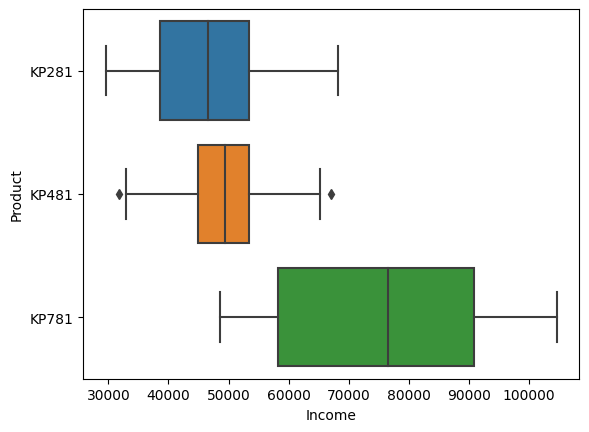

In [ ]:
sns.boxplot(data = df , y = "Product", x="Income")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Income"], aggfunc = ['median', "count"], margins = True)



median                    count          
Gender    Female     Male      All Female Male  All
Product                                            
KP281    46048.5  46617.0  46617.0     40   40   80
KP481    48891.0  50028.0  49459.5     29   31   60
KP781    69721.0  77191.0  76568.5      7   33   40
All      47754.0  52302.0  50596.5     76  104  180

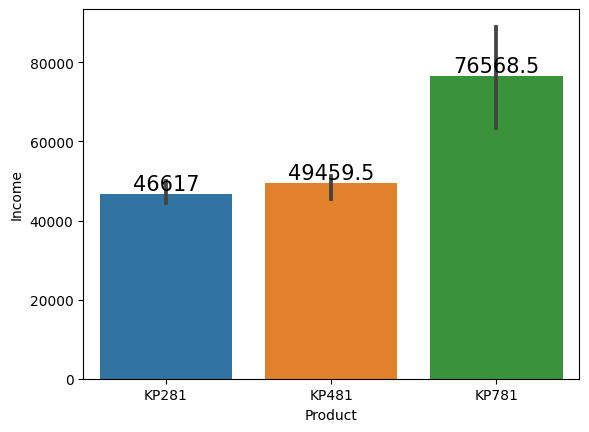

In [ ]:
x = sns.barplot(data = df, x="Product",y="Income", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

In [ ]:
df.groupby(["Product","Gender"])["Income"].aggregate([min,max,"median","count"])

min     max   median  count
Product Gender                               
KP281   Female  30699   67083  46048.5     40
        Male    29562   68220  46617.0     40
KP481   Female  34110   65220  48891.0     29
        Male    31836   67083  50028.0     31
KP781   Female  52291   95866  69721.0      7
        Male    48556  104581  77191.0     33

##**Analaysis-**

**For KP281-**

there is approx (80/180) **44.44%** chance of a customer having income near Rs.46,000 then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180) **33.33%** chance of a customer having income near Rs.49,000 then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer having income near Rs.76,000 then he/she opts this type of treadmill

###Relation between Type of treadmill and age

In [ ]:
df[df["Product"]=="KP281"].describe()["Age"]

count    80.000000
mean     28.550000
std       7.221452
min      18.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      50.000000
Name: Age, dtype: float64

In [ ]:
e = ECDF(df["Age"])

In [ ]:
e(28.550000)

# around 59.4% of data lies below mean, which shows distribution is not normal

0.5944444444444444

In [ ]:
df[df["Product"]=="KP481"].describe()["Age"]

count    60.000000
mean     28.900000
std       6.645248
min      19.000000
25%      24.000000
50%      26.000000
75%      33.250000
max      48.000000
Name: Age, dtype: float64

In [ ]:
e(28.900000)

# around 59.4% of data lies below mean, which shows distribution is not normal

0.5944444444444444

In [ ]:
df[df["Product"]=="KP781"].describe()["Age"]

count    40.000000
mean     29.100000
std       6.971738
min      22.000000
25%      24.750000
50%      27.000000
75%      30.250000
max      48.000000
Name: Age, dtype: float64

In [ ]:
e(29.100000)

# around 62.7% of data lies below mean, which shows distribution is not normal

0.6277777777777778

In [ ]:
#Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

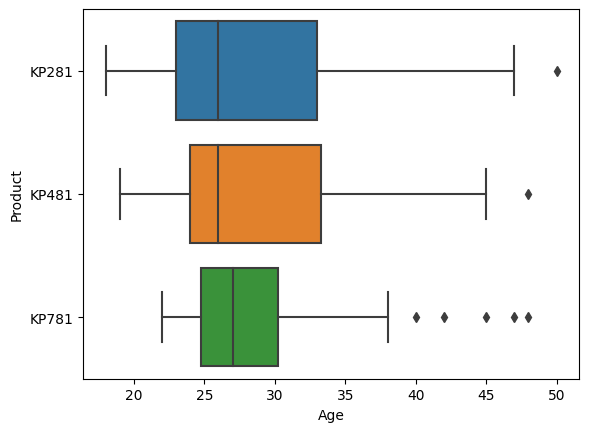

In [ ]:
sns.boxplot(data = df , y = "Product", x="Age")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Age"], aggfunc = ['median', "count"], margins = True)

median              count          
Gender  Female  Male   All Female Male  All
Product                                    
KP281     26.5  26.0  26.0     40   40   80
KP481     29.0  25.0  26.0     29   31   60
KP781     26.0  27.0  27.0      7   33   40
All       26.5  26.0  26.0     76  104  180

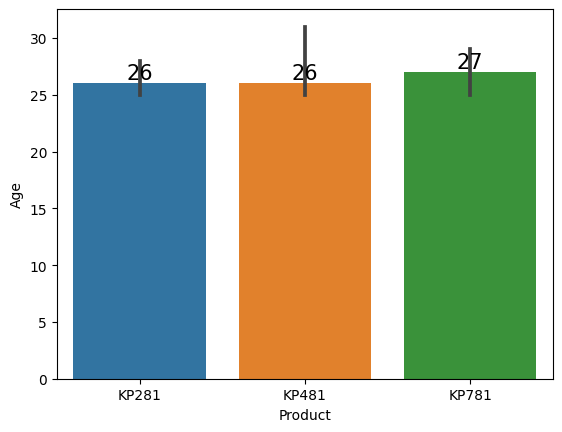

In [ ]:
x = sns.barplot(data = df, x="Product",y="Age", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

##**Analaysis-**

**For KP281-**

there is approx (80/180) **44.44%** chance of a customer having age near 26 years then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180)**33.33%** chance of a customer having age near 26 years then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer having age near 27 years then he/she opts this type of treadmill

###Relation between type of treadmill and education

In [ ]:
df[df["Product"]=="KP281"].describe()["Education"]

count    80.000000
mean     15.037500
std       1.216383
min      12.000000
25%      14.000000
50%      16.000000
75%      16.000000
max      18.000000
Name: Education, dtype: float64

In [ ]:
e= ECDF(df["Education"])

In [ ]:
e(15.037500)

# around 37.7% of data lies below mean, which shows distribution is not normal

0.37777777777777777

In [ ]:
df[df["Product"]=="KP481"].describe()["Education"]

count    60.000000
mean     15.116667
std       1.222552
min      12.000000
25%      14.000000
50%      16.000000
75%      16.000000
max      18.000000
Name: Education, dtype: float64

In [ ]:
e(15.116667)

# around 37.7% of data lies below mean, which shows distribution is not normal

0.37777777777777777

In [ ]:
df[df["Product"]=="KP781"].describe()["Education"]

count    40.000000
mean     17.325000
std       1.639066
min      14.000000
25%      16.000000
50%      18.000000
75%      18.000000
max      21.000000
Name: Education, dtype: float64

In [ ]:
e(17.325000)

# around 85% of data lies below mean, which shows distribution is not normal

0.85

In [ ]:
#Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

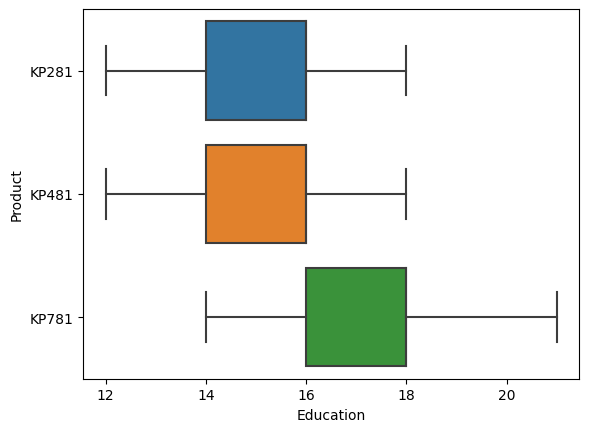

In [ ]:
sns.boxplot(data = df , y = "Product", x="Education")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Education"], aggfunc = ['median',"count"], margins = True)

median              count          
Gender  Female  Male   All Female Male  All
Product                                    
KP281     15.5  16.0  16.0     40   40   80
KP481     16.0  16.0  16.0     29   31   60
KP781     18.0  18.0  18.0      7   33   40
All       16.0  16.0  16.0     76  104  180

In [ ]:
df.groupby(["Product","Gender"])["Education"].aggregate([min,max,"median","count"])

min  max  median  count
Product Gender                         
KP281   Female   14   18    15.5     40
        Male     12   18    16.0     40
KP481   Female   13   18    16.0     29
        Male     12   16    16.0     31
KP781   Female   16   21    18.0      7
        Male     14   21    18.0     33

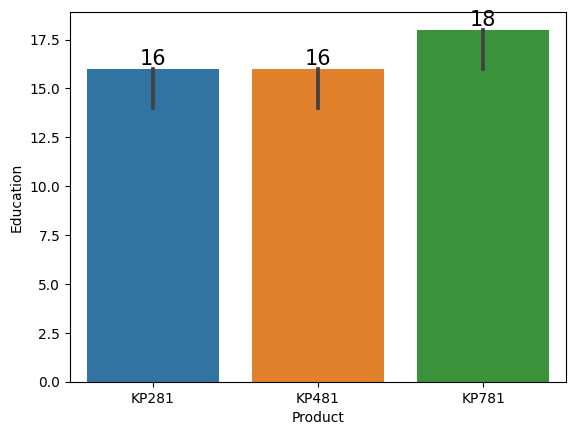

In [ ]:
x = sns.barplot(data = df, x="Product",y="Education", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

##**Analaysis-**

**For KP281-**

there is approx (80/180) **44.44%** chance of a customer having education of around 16 years then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180)**33.33%** chance of a customer having  education of around 16 years then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer having  education of around 18 years then he/she opts this type of treadmill

###Relation between type of treadmill and usage

In [ ]:
df[df["Product"]=="KP281"].describe()["Usage"]

count    80.000000
mean      3.087500
std       0.782624
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Usage, dtype: float64

In [ ]:
e= ECDF(df["Usage"])

In [ ]:
e(3.087500)

# around 56.7% of data lies below mean, which shows distribution is not normal

0.5666666666666667

In [ ]:
df[df["Product"]=="KP481"].describe()["Usage"]

count    60.000000
mean      3.066667
std       0.799717
min       2.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: Usage, dtype: float64

In [ ]:
e(3.066667)

# around 56.7% of data lies below mean, which shows distribution is not normal

0.5666666666666667

In [ ]:
df[df["Product"]=="KP781"].describe()["Usage"]

count    40.000000
mean      4.775000
std       0.946993
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       7.000000
Name: Usage, dtype: float64

In [ ]:
e(4.775000)

# around 85.5% of data lies below mean, which shows distribution is not normal

0.8555555555555555

In [ ]:
#Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

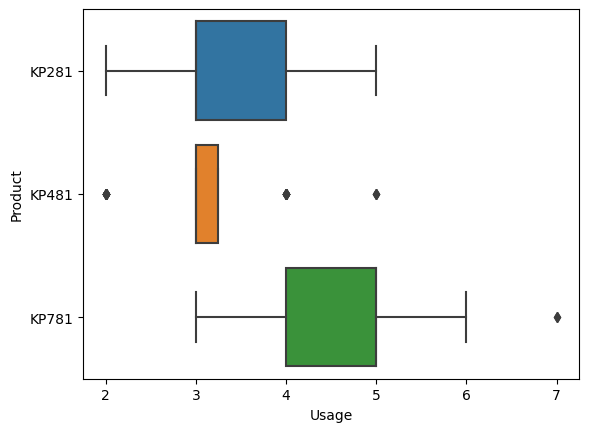

In [ ]:
sns.boxplot(data = df , y = "Product", x="Usage")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Usage"], aggfunc = ['median',"count"], margins = True)

median            count          
Gender  Female Male  All Female Male  All
Product                                  
KP281        3    3  3.0     40   40   80
KP481        3    3  3.0     29   31   60
KP781        5    4  5.0      7   33   40
All          3    4  3.0     76  104  180

In [ ]:
df.groupby(["Product","Gender"])["Usage"].aggregate([min,max,"median","count"])

min  max  median  count
Product Gender                         
KP281   Female    2    5     3.0     40
        Male      2    5     3.0     40
KP481   Female    2    5     3.0     29
        Male      2    4     3.0     31
KP781   Female    4    6     5.0      7
        Male      3    7     4.0     33

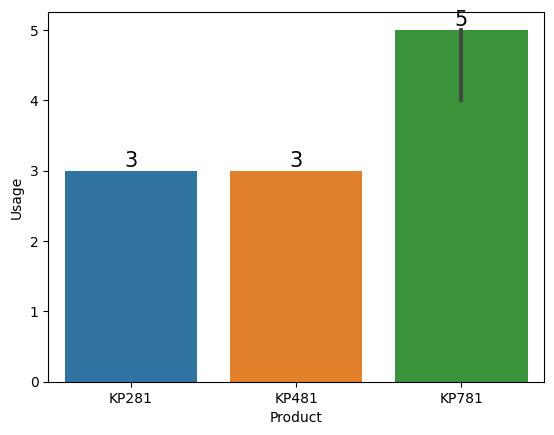

In [ ]:
x = sns.barplot(data = df, x="Product",y="Usage", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

##**Analaysis-**

**For KP281-**

there is approx (80/180) **44.44%** chance of a customer planning to use treadmill aroud 3 times a week then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180)**33.33%** chance of a customer planning to use treadmill aroud 3 times a week then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer planning to use treadmill aroud 5 times a week then he/she opts this type of treadmill

###Relation between tpye of treadmill and fitness

In [ ]:
df[df["Product"]=="KP281"].describe()["Fitness"]

count    80.00000
mean      2.96250
std       0.66454
min       1.00000
25%       3.00000
50%       3.00000
75%       3.00000
max       5.00000
Name: Fitness, dtype: float64

In [ ]:
e= ECDF(df["Fitness"])

In [ ]:
e(2.96250)

# around 15.5% of data lies below mean, which shows distribution is not normal

0.15555555555555556

In [ ]:
df[df["Product"]=="KP481"].describe()["Fitness"]

count    60.00000
mean      2.90000
std       0.62977
min       1.00000
25%       3.00000
50%       3.00000
75%       3.00000
max       4.00000
Name: Fitness, dtype: float64

In [ ]:
e(2.90000)

# around 15.5% of data lies below mean, which shows distribution is not normal

0.15555555555555556

In [ ]:
df[df["Product"]=="KP781"].describe()["Fitness"]

count    40.000000
mean      4.625000
std       0.667467
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Fitness, dtype: float64

In [ ]:
e(4.625000)

# around 82.7% of data lies below mean, which shows distribution is not normal

0.8277777777777778

In [ ]:
#Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

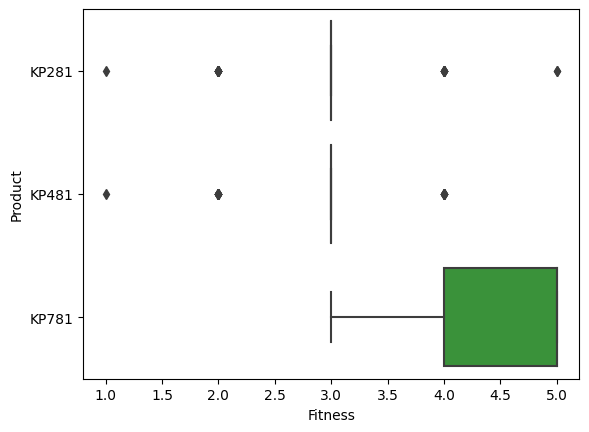

In [ ]:
sns.boxplot(data = df , y = "Product", x="Fitness")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Fitness"], aggfunc = ['median',"count"], margins = True)

median            count          
Gender  Female Male  All Female Male  All
Product                                  
KP281        3    3  3.0     40   40   80
KP481        3    3  3.0     29   31   60
KP781        5    5  5.0      7   33   40
All          3    3  3.0     76  104  180

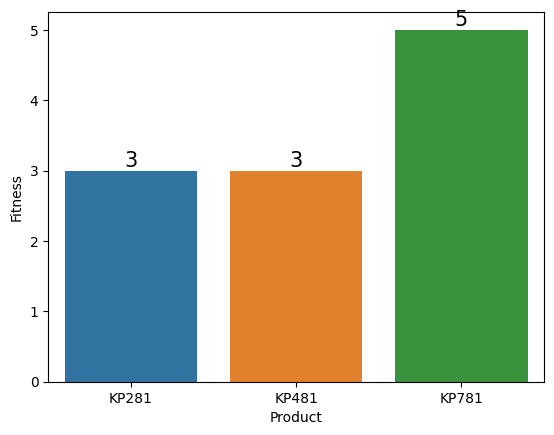

In [ ]:
x = sns.barplot(data = df, x="Product",y="Fitness", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

##**Analaysis-**

**For KP281-**

there is approx (80/180)**44.44%** chance of a customer rating themselves 3 or in average shape then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180) **33.33%** chance of a customer rating themselves 3 or in average shape then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer rating themselves  or in excellent shape then he/she opts this type of treadmill

###Relation between type of treadmill and miles

In [ ]:
df[df["Product"]=="KP281"].describe()["Miles"]

count     80.000000
mean      82.787500
std       28.874102
min       38.000000
25%       66.000000
50%       85.000000
75%       94.000000
max      188.000000
Name: Miles, dtype: float64

In [ ]:
e= ECDF(df["Miles"])

In [ ]:
e(82.787500)

# around 33.3% of data lies below mean, which shows distribution is not normal

0.3333333333333333

In [ ]:
df[df["Product"]=="KP481"].describe()["Miles"]

count     60.000000
mean      87.933333
std       33.263135
min       21.000000
25%       64.000000
50%       85.000000
75%      106.000000
max      212.000000
Name: Miles, dtype: float64

In [ ]:
e(87.933333)

# around 48.3% of data lies below mean, which shows distribution is not normal

0.48333333333333334

In [ ]:
df[df["Product"]=="KP781"].describe()["Miles"]

count     40.000000
mean     166.900000
std       60.066544
min       80.000000
25%      120.000000
50%      160.000000
75%      200.000000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
e(166.900000)

# around 87.2% of data lies below mean, which shows distribution is not normal

0.8722222222222222

In [ ]:
#Since the distribution is not normal, so considering median for analysis instead of mean as mean is affected by the outliers

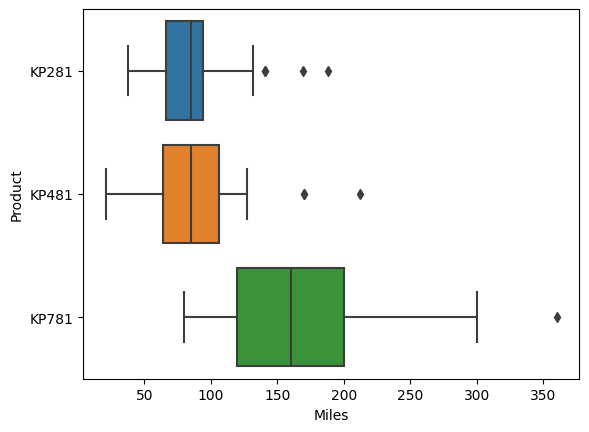

In [ ]:
sns.boxplot(data = df , y = "Product", x="Miles")

plt.show()

In [ ]:
pd.crosstab(index = df["Product"], columns = df["Gender"]  ,values = df["Miles"], aggfunc = ['median','count'], margins = True)

median              count          
Gender  Female Male    All Female Male  All
Product                                    
KP281       75   85   85.0     40   40   80
KP481       85   95   85.0     29   31   60
KP781      200  160  160.0      7   33   40
All         85  100   94.0     76  104  180

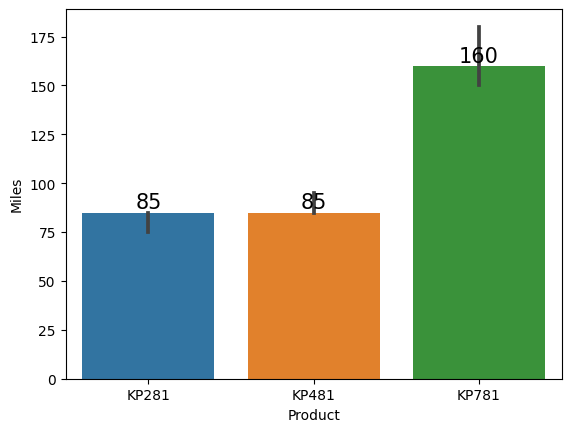

In [ ]:
x = sns.barplot(data = df, x="Product",y="Miles", estimator = np.median)

for i in x.containers:
  x.bar_label(i, fontsize = 15)

##**Analaysis-**

**For KP281-**

there is approx (80/180) **44.44%** chance of a customer expecting to run/walk 85 miles in a week then he/she opts this type of treadmill

**For KP481-**

there is approx (60/180)**33.33%** chance of a customer expecting to run/walk 85 miles in a week then he/she opts this type of treadmill


**For KP781-**

there is approx only (40/180) **22.22%** chance of a customer expecting to run/walk 160 miles in a week then he/she opts this type of treadmill

we can safetly assume the below observations are somewhat accurate and are not affected by the outliers since we are considering median for the analysis which is not much affected by the outliers.

#From the past 3 month sales data we deduced-

##the treadmill type KP281 is most preferred by the customers who has the following characterstics-

1. **age**- around 26 years
2. **education**- around 16 years
3. **usage**- around 3 times a week
4. **fitness**- self rated around 3
5. **income**- around Rs. 46000
6. **miles**- expecting to run/walk 85 miles a week

this type is most preferred by the female customers and male customers and also partnered/married customers and single/unmarried customers, who has above characterstics.




##the treadmill type KP481 is most preferred by the customers who has the following characterstics-

1. **age**- around 26 years
2. **education**- around 16 years
3. **usage**- around 3 times a week
4. **fitness**- self rated around 3
5. **income**- around Rs.49000
6. **miles**- expecting to run/walk 85 miles a week

this type is second most preferred by the female customers and least preferred by male customers and second most preferred by partnered/married customers and single/unmarried customers, who has above characterstics.

##the treadmill type KP781 is most preferred by the customers who has the following characterstics-

1. **age**- around 27 years
2. **education**- around 18 years
3. **usage**- around 5 times a week
4. **fitness**- self rated around 35
5. **income**- around Rs.76000
6. **miles**- expecting to run/walk 160 miles a week

this type is least preferred by the female customers and second most preferred by male customers and least preferred by partnered/married and single/unmarried customers, who has above characterstics.

#Summary-

we can predict the following from the whole activity that-

1. male customers who are more educated, conscious towards health, young, have excellent body shape, earns more and ready to work hard on their body will definitely prefer treadmill type KP781, which has advanced features.

2. Among the rest young customers, the major difference is based on the salary for their choice of the treadmill type.
both female and male customers who are moderate conscious towards health, are married, ready to workout at an average level, avergae fit and who earns bit more tend to prefer type KP481.

3. all the other customers tend to prefer the basic model KP281, so we can say they are newly conscious towards health and are married couple prefer to workout together at an average level.

##**Recommendation-**

to get customer characterstics, we have to ask following details from the customers-

1. age
2. marital status
3. education (in years)
4. income
5. expected use of treadmill per week
6. expected distance to walk/run in a week
7. gender
8. self rating of fitness


based on the characterstics we can recommend the type of treadmill to customers:-


those who have high income, high education, extra motivated for workout in sense of usage of treadmill in a week and expected distance cover, fit, young--- we can recommend them most advanced model KP781.

those customers who are average motivated for workout in sense of usage of treadmill and expected distance cover, have good education, young, have moderate income, maybe married, average fit--- we can recommend them our intermediate model KP481.

those customers who have somewhat low income, married, good education, avergae motivated for workout, young, maybe beginner in workout--- we can recommend them our beginner model KP281.

